## Libraries

In [1]:
#pip install mysql-connector-python
import mysql.connector
import pandas.io.sql as psql
import pandas as pd

import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import HTML


## Make the coneccion

In [2]:
conexion = mysql.connector.connect(user='root', password ='12345',
                                    host='localhost',
                                    database='nuevo_esquema',
                                    port='3306')
print(conexion)

## We make the query

In [3]:
Q1 = '''
SELECT 
    COUNT(DISTINCT t1.SalesOrderID) as transacciones,
    ROUND(SUM(t1.TotalDue),2) AS ventas
FROM nuevo_esquema.salesorderheader AS t1
	GROUP BY YEAR(t1.OrderDate),MONTH(t1.OrderDate)
    ORDER BY YEAR(t1.OrderDate),MONTH(t1.OrderDate);
'''
df = pd.read_sql_query(Q1, con=conexion)
conexion.close()

c:\Users\relat\.conda\envs\maestria\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
# We show the query
df.head(5)

,transacciones,ventas
0,43,665262.96
1,221,2573039.56
2,215,2104739.32
3,186,1642062.77
4,253,3666605.86


## Make the model : "Linear Regression"

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal of linear regression is to find the line of best fit that can accurately predict the value of the dependent variable based on the values of the independent variables. This line of best fit is represented by a linear equation, which has the form Y = aX + b, where Y is the dependent variable, X is the independent variable, a is the slope of the line, and b is the y-intercept (the point at which the line crosses the y-axis). Linear regression can be used to make predictions, identify trends and patterns in data, and understand the impact of different variables on the dependent variable.

### We assign the values of x and y from the dataset


In [5]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
# Here is the trick
X = X.reshape(-1,1) # Make the array

### We create plots

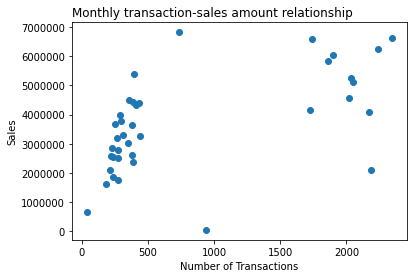

In [7]:
plt.scatter(X, y)
plt.xlabel("Number of Transactions")
plt.ylabel("Sales")
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Monthly transaction-sales amount relationship', loc='left')
plt.show()

### Split the data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### We create the model

In [21]:
lr = linear_model.LinearRegression()

### We train the model

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

### We obtain the predictions

In [13]:
Y_pred = lr.predict(X_test)

### We explore the output of the model

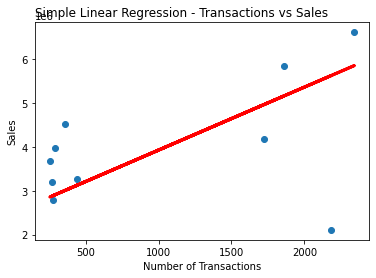

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Simple Linear Regression - Transactions vs Sales', loc='left')
plt.xlabel('Number of Transactions')
plt.ylabel('Sales')
plt.show()

### The values obtained with the model

In [17]:
#Coefficient
print("Coefficient: ",lr.coef_)
#Intercept
print("Intercept: ",lr.intercept_)
print("")
# The equation of the regression
print("The equation for the regression is:")
print("y = ", lr.coef_, "X ", "+", lr.intercept_)

Coefficient:  [1432.53920398]
Intercept:  2493491.396507797

The equation for the regression is:
y =  [1432.53920398] X  + 2493491.396507797


### Accuray of the model

In [25]:
print("Accuracy of the model using training data: ",lr.score(X_train, y_train))

Accuracy of the model using training data:  0.33211671179934643


In [24]:
print("Accuracy of the model using testing data: ",lr.score(X_test, y_test))

Accuracy of the model using testing data:  -0.02675682097919707


###  Analysis

In this exercise, it is important to explain that the model is not a good fit for the data because the R-squared value is closer to zero (-0.026) than one. R-squared measures the amount of variability in the data that can be explained by the model and ranges from 0 to 1, with values closer to 1 indicating a better fit. A negative R-squared value suggests that the model is making worse predictions than simply using the mean of the data to make predictions. This could be because the model doesn't have enough information to make accurate predictions, or it could be a sign of errors in the data or in the model. It is important to carefully review the model and the data to determine the cause of the negative R-squared value and how the model can be improved.

For this reason, it is necessary to explain to the business that the solution at this moment is to work with the mean of the data. One way to improve the model is to obtain more information about the transactions, and if possible, improve the granularity of the information.